<center>
    <h1><b>Titanic Prediction: Decision Tree</b></h1>
    ---------------------------
</center>

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
import pickle as pk

%matplotlib inline

In [2]:
# Loading dataset
df = pd.read_csv(r'D:\AI Engineering\Python\My_Projects\Datasets\titanic.csv')

### Data Exploration

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
# Selecting columns needed in the dataset
df1 = df[['Pclass', 'Sex', 'Age', 'Fare', 'Survived']]

In [5]:
df1.head()

,Pclass,Sex,Age,Fare,Survived
0,3,male,34.5,7.8292,0
1,3,female,47.0,7.0000,1
2,2,male,62.0,9.6875,0
3,3,male,27.0,8.6625,0
4,3,female,22.0,12.2875,1


In [6]:
# changing columns labels to lower case
df1.columns = df1.columns.str.lower()

In [7]:
# Confirming the column labels are changed
df1.head(0)

,pclass,sex,age,fare,survived


In [8]:
# Checking null values
df1.isnull().sum()

pclass       0
sex          0
age         86
fare         1
survived     0
dtype: int64

In [9]:
# Checking the basic information of the columns
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    418 non-null    int64  
 1   sex       418 non-null    object 
 2   age       332 non-null    float64
 3   fare      417 non-null    float64
 4   survived  418 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 16.5+ KB


In [10]:
# Checking the number of rows and columns
df1.shape

(418, 5)

In [11]:
# Fill rows with Nan values with median
def fillna_with_median(col):
    median = col.median()
    return col.fillna(median)

In [12]:
df1.loc[:, ['age', 'fare']] = df1[['age', 'fare']].apply(fillna_with_median)

In [13]:
# checking if the changes were implemented
df1[['age', 'fare']].isnull().sum()

age     0
fare    0
dtype: int64

In [14]:
# changing age, and fare columns values to datatype int

df1.loc[:,['age']] = np.floor(df1['age']).astype(int)
df1.loc[:,['fare']] = df1['fare'].round(0).astype(int)

In [15]:
df1.head(5)

,pclass,sex,age,fare,survived
0,3,male,34.0,8.0,0
1,3,female,47.0,7.0,1
2,2,male,62.0,10.0,0
3,3,male,27.0,9.0,0
4,3,female,22.0,12.0,1


### Visualizing the numeric columns to confirm relationships

In [16]:
# columns with numeric values
num_cols = [col for col in df1.select_dtypes(exclude = 'object').columns]

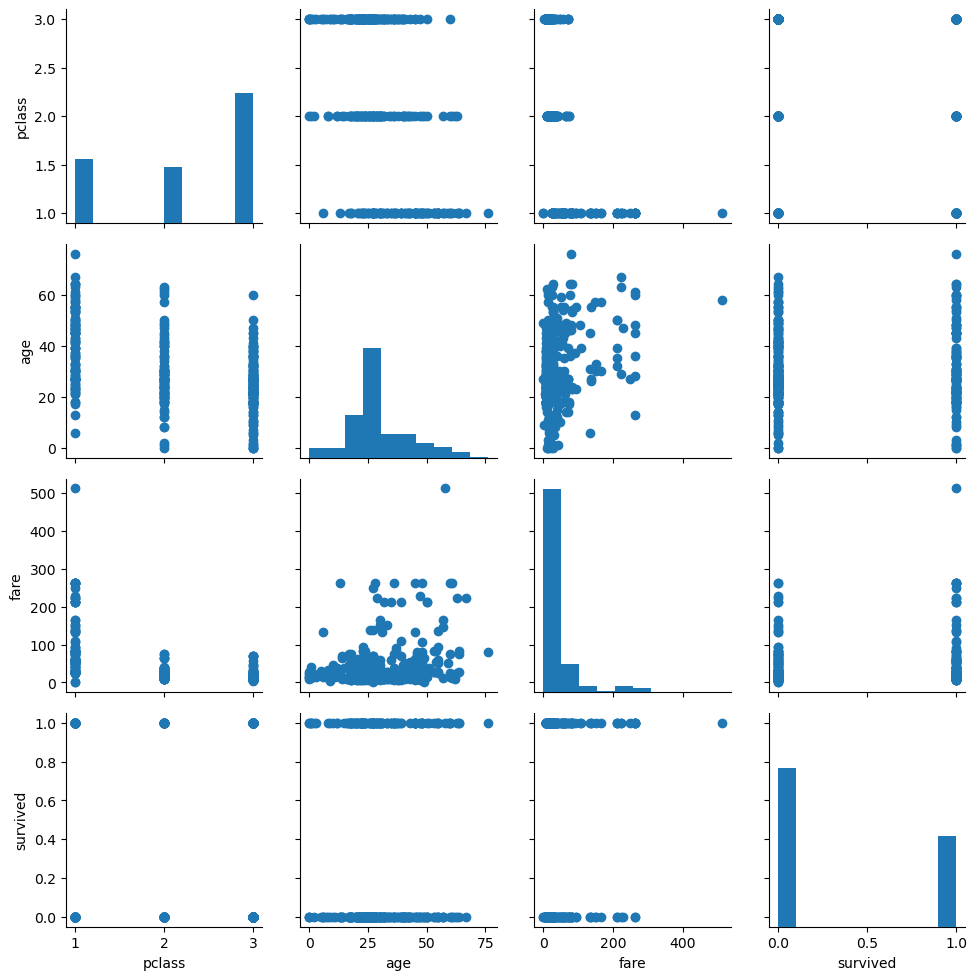

In [17]:
# Pairwise Visualization
pairwise = sb.PairGrid(data = df1, vars = num_cols)
pairwise = pairwise.map_diag(plt.hist, bins = 10)
pairwise.map_offdiag(plt.scatter);

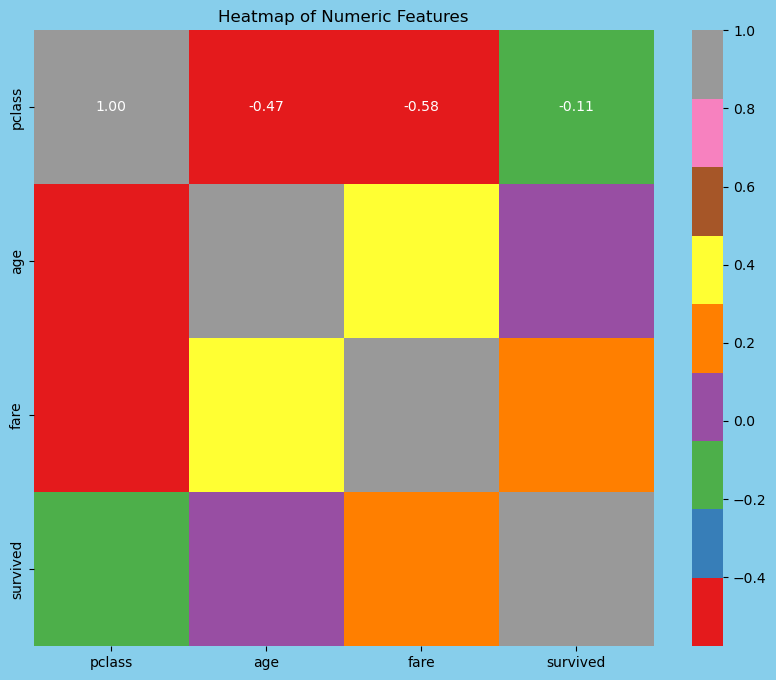

In [18]:
# heatmap visualization
plt.figure(figsize = (10, 8), facecolor = 'skyblue', edgecolor = 'white')
heatmap = sb.heatmap(df1[num_cols].corr(), annot = True, cmap = 'Set1', fmt = '.2f', annot_kws = {'size':10})
plt.title("Heatmap of Numeric Features");

### Model building

In [19]:
# Defining independent and dependent variables as X, and y
X = df1.drop('survived', axis = 1)
y = df1['survived']

In [20]:
X.head(2)

,pclass,sex,age,fare
0,3,male,34.0,8.0
1,3,female,47.0,7.0


In [21]:
y

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: survived, Length: 418, dtype: int64

In [22]:
le_sex = LabelEncoder()
X.loc[:,['sex_n']] = le_sex.fit_transform(X['sex'])

In [23]:
X.head(2)

,pclass,sex,age,fare,sex_n
0,3,male,34.0,8.0,1
1,3,female,47.0,7.0,0


In [24]:
X = X.drop('sex', axis = 1)

In [25]:
X.head(2)

,pclass,age,fare,sex_n
0,3,34.0,8.0,1
1,3,47.0,7.0,0


In [26]:
"""
# Transform the 'sex' column using OneHotEncoder
col_transform = ColumnTransformer(transformers=[('cat', OneHotEncoder(), ['sex'])], remainder='passthrough')
X_transformed = col_transform.fit_transform(X)

# Converting the output to dataframe
X_transformed_df = pd.DataFrame(X_transformed, columns = col_transform.get_feature_names_out())
X_transformed_df.head(5)
"""

"\n# Transform the 'sex' column using OneHotEncoder\ncol_transform = ColumnTransformer(transformers=[('cat', OneHotEncoder(), ['sex'])], remainder='passthrough')\nX_transformed = col_transform.fit_transform(X)\n\n# Converting the output to dataframe\nX_transformed_df = pd.DataFrame(X_transformed, columns = col_transform.get_feature_names_out())\nX_transformed_df.head(5)\n"

In [27]:
"""# Define the decision tree classifier and hyperparameter grid
tree = DecisionTreeClassifier()
tree_param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

# Hyperparameter tunnig

model = GridSearchCV(estimator=tree, param_grid=tree_param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)

model.fit(X_train, y_train)

# Decision tree evaluation
tree_best = model.best_estimator_
tree_metrics = model_prediction(tree_best, X_test, y_test)

"""

"# Define the decision tree classifier and hyperparameter grid\ntree = DecisionTreeClassifier()\ntree_param_grid = {\n    'max_depth': [None, 5, 10, 15, 20],\n    'min_samples_split': [2, 5, 10],\n    'min_samples_leaf': [1, 2, 5]\n}\n\n# Hyperparameter tunnig\n\nmodel = GridSearchCV(estimator=tree, param_grid=tree_param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)\n\nmodel.fit(X_train, y_train)\n\n# Decision tree evaluation\ntree_best = model.best_estimator_\ntree_metrics = model_prediction(tree_best, X_test, y_test)\n\n"

In [28]:
# Cretaing training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [29]:
# creating model class
model = tree.DecisionTreeClassifier()

model.fit(X_train, y_train)

DecisionTreeClassifier()

#### Model Evaluation

In [30]:
def model_prediction(model, X_test, y_test):
    prediction = model.predict(X_test)
    accuracy = accuracy_score(y_test, prediction)
    precision = precision_score(y_test, prediction, average ='weighted')
    recall = recall_score(y_test, prediction, average = 'weighted')
    f1 = f1_score(y_test, prediction, average ='weighted')
    roc_auc =  roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

    print(f'Accuracy: {(accuracy * 100).round(2)}%')
    print(f'Precision: {(precision * 100).round(2)}%')
    print(f'Recall: {(recall * 100).round(2)}%')
    print(f'F1 Score: {(f1 * 100).round(2)}%')
    print(f'AUC_ROC: {(roc_auc * 100).round(2)}%')

In [31]:
# Decision tree evaluation
tree_metrics = model_prediction(model, X_test, y_test)

Accuracy: 100.0%
Precision: 100.0%
Recall: 100.0%
F1 Score: 100.0%
AUC_ROC: 100.0%


In [32]:
model.score(X_test, y_test)

1.0

#### Saving the model

In [33]:
# saving model as pickle file
with open('model_decision_tree_titanic', 'wb') as file:
    pk.dump(model, file)